In [304]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  

In [312]:
means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3
X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis = 0)

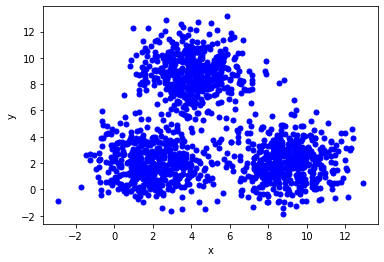

In [313]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(X[:, 0], X[:, 1], 'bo', markersize=5)
plt.plot()
plt.show()

In [314]:
def kmeans_init_centers(X, n_cluster):
    
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

In [315]:
def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis = 1)

In [316]:
def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
    
        Xk = X[labels == k, :]

        centers[k,:] = np.mean(Xk, axis = 0)
    return centers
 
    

In [317]:
def kmeans_has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == 
        set([tuple(a) for a in new_centers]))

In [318]:
def kmeans_visualize(X, centers, labels, n_cluster, title):
    plt.xlabel('x') # label trục x
    plt.ylabel('y') # label trục y
    plt.title(title) # title của đồ thị
    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'] # danh sách các màu hỗ trợ
 
    for i in range(n_cluster):
        data = X[labels == i] # lấy dữ liệu của cụm i
        plt.plot(data[:, 0], data[:, 1], plt_colors[i] + '^', markersize = 4, label = 'cluster_' + str(i)) # Vẽ cụm i lên đồ thị
        plt.plot(centers[i][0], centers[i][1],  plt_colors[i+4] + 'o', markersize = 10, label = 'center_' + str(i)) # Vẽ tâm cụm i lên đồ thị
    plt.legend() # Hiện bảng chú thích
    plt.show()

In [322]:
def kmeans(init_centes, init_labels, X, n_cluster):
    centers = init_centes
    labels = init_labels
    times = 0
    while True:
        labels = kmeans_predict_labels(X, centers)
        kmeans_visualize(X, centers, labels, n_cluster, 'Assigned label for data at time = ' + str(times + 1))
        new_centers = kmeans_update_centers(X, labels, n_cluster)
        if kmeans_has_converged(centers, new_centers):
            break
        centers = new_centers
        kmeans_visualize(X, centers, labels, n_cluster, 'Update center possition at time = ' + str(times + 1))
        times += 1
    return (centers, labels, times)

[[ 3.00742871  7.56126042]
 [10.55862796  2.48864886]
 [10.76037899  4.34246306]]


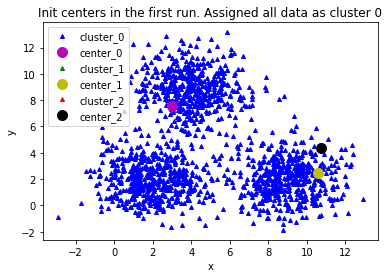

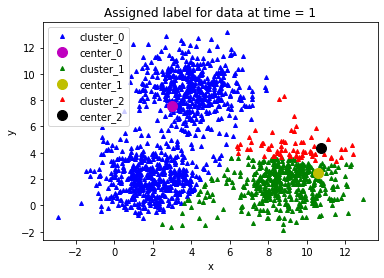

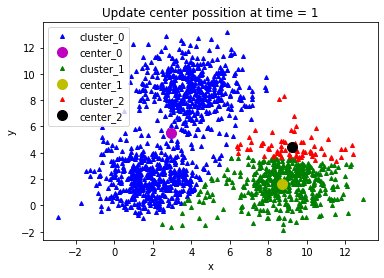

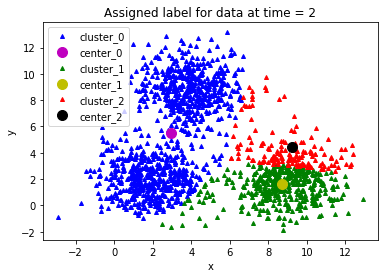

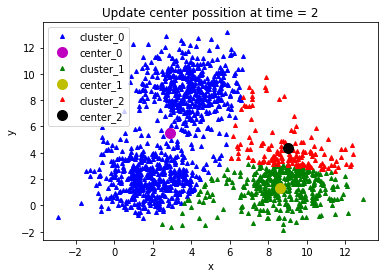

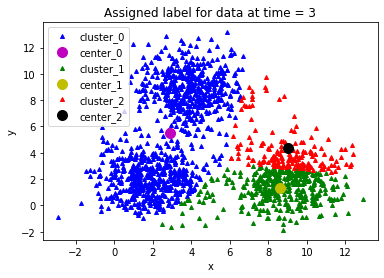

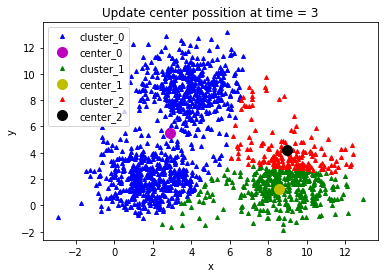

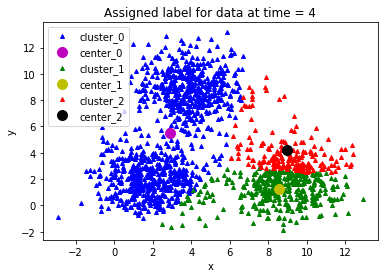

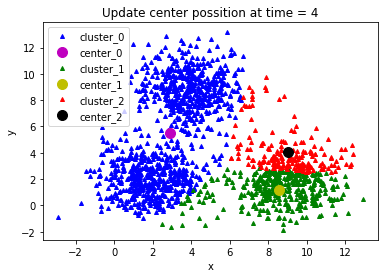

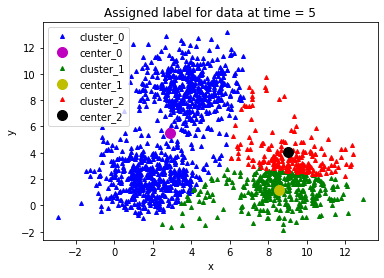

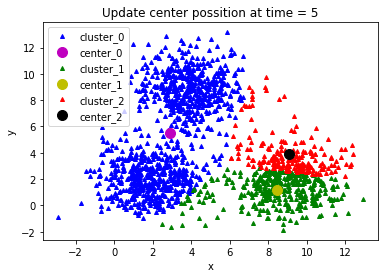

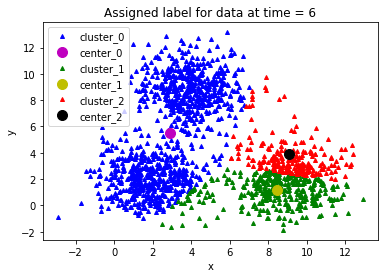

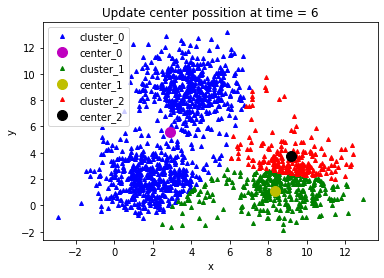

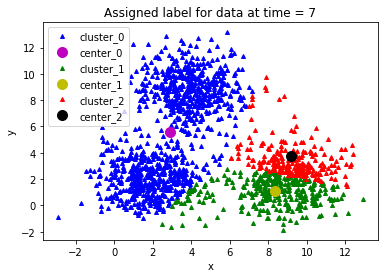

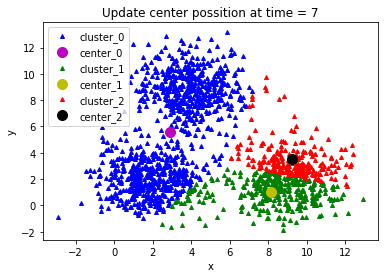

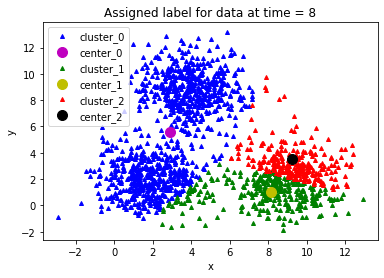

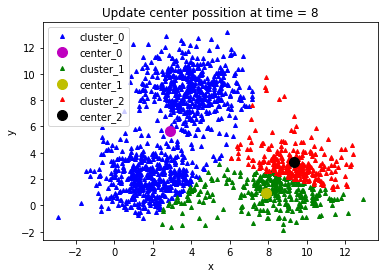

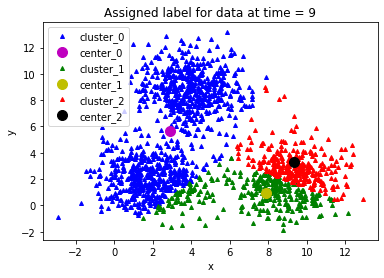

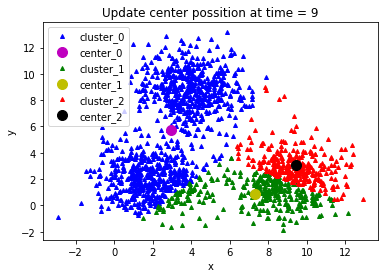

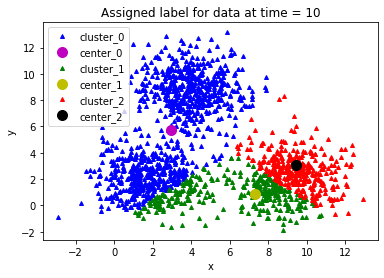

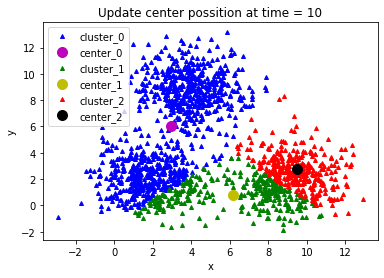

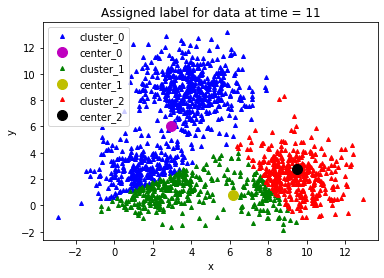

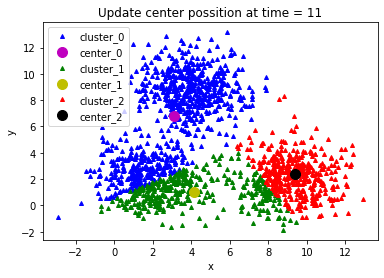

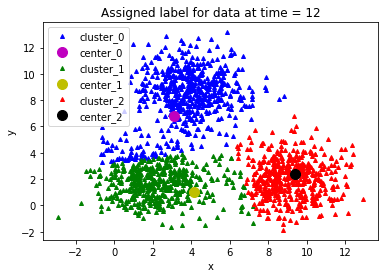

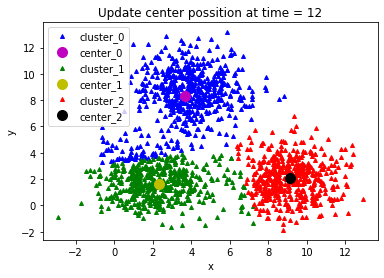

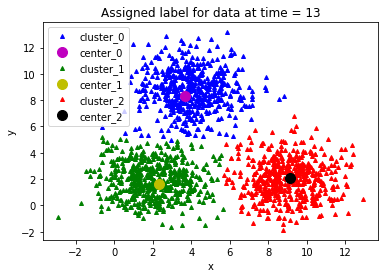

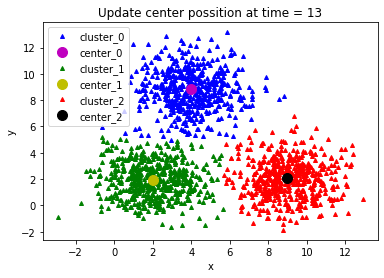

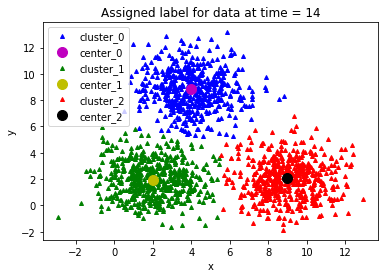

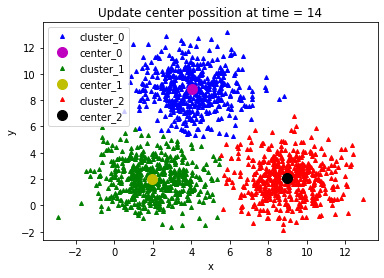

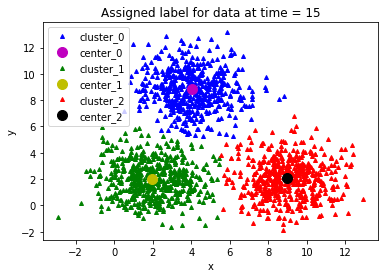

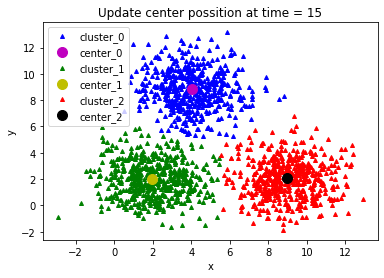

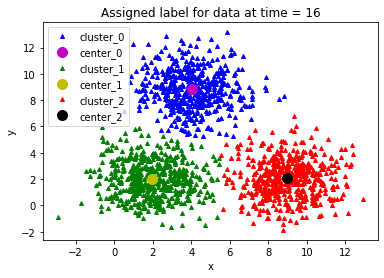

Done! Kmeans has converged after 15 times


In [324]:
init_centers = kmeans_init_centers(X, n_cluster)
print(init_centers) 
init_labels = np.zeros(X.shape[0])
kmeans_visualize(X, init_centers, init_labels, n_cluster, 'Init centers in the first run. Assigned all data as cluster 0')
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)
 
print('Done! Kmeans has converged after', times, 'times')